<a href="https://colab.research.google.com/github/CarlosGuarneros/Actividadades-TDAW/blob/main/PRUEBAS_Pr%C3%A1ctica_1_3_(Transformada_de_Hough_y_Etiquetado_de_componentes_conectados).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

# Función para aplicar Canny
def canny_edge_detection(image, low_threshold, high_threshold):
    # Convertir la imagen a escala de grises
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar el filtro de Sobel para encontrar gradientes en la imagen
    sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)

    # Calcular la magnitud del gradiente
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Calcular la dirección del gradiente
    gradient_direction = np.arctan2(sobel_y, sobel_x)

    # Aplicar la supresión de no máximos
    suppressed_gradient = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_direction[i, j]
            if (angle >= 0 and angle <= np.pi / 4) or (angle >= 7 * np.pi / 4 and angle <= 2 * np.pi):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (angle >= np.pi / 4 and angle <= 3 * np.pi / 4):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j - 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j + 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (angle >= 3 * np.pi / 4 and angle <= 5 * np.pi / 4):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            else:
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j + 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j - 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]

    # Aplicar la binarización con histéresis (Canny)
    high_threshold = np.max(suppressed_gradient) * high_threshold
    low_threshold = high_threshold * low_threshold

    # Crear una imagen de bordes final
    edge_image = np.zeros_like(suppressed_gradient, dtype=np.uint8)
    strong_edge_i, strong_edge_j = np.where(suppressed_gradient >= high_threshold)
    weak_edge_i, weak_edge_j = np.where((suppressed_gradient >= low_threshold) &
                                        (suppressed_gradient < high_threshold))

    edge_image[strong_edge_i, strong_edge_j] = 255
    edge_image[weak_edge_i, weak_edge_j] = 50  # Valor intermedio para bordes débiles

    return edge_image

# Función para aplicar la Transformada de Hough
def hough_transform(edge_image, theta_resolution=1, rho_resolution=1):
    height, width = edge_image.shape
    max_rho = int(np.sqrt(height**2 + width**2))

    # Rango de valores de theta
    thetas = np.deg2rad(np.arange(-90, 90, theta_resolution))

    # Matriz acumuladora para la Transformada de Hough
    accumulator = np.zeros((2 * max_rho, len(thetas)), dtype=np.uint64)

    # Obtener las coordenadas de los bordes detectados
    edge_coordinates = np.argwhere(edge_image > 0)

    for i in range(len(edge_coordinates)):
        y, x = edge_coordinates[i]
        for t_index in range(len(thetas)):
            rho = int(x * np.cos(thetas[t_index]) + y * np.sin(thetas[t_index]))
            rho_index = rho + max_rho
            accumulator[rho_index, t_index] += 1

    return accumulator, thetas

# Cargar la imagen
image = cv2.imread('um_000002.png')

# Aplicar Canny para detectar bordes
edge_image = canny_edge_detection(image, low_threshold=0.1, high_threshold=0.3)

# Aplicar la Transformada de Hough
accumulator, thetas = hough_transform(edge_image)

# Detectar líneas a partir de los máximos en la matriz acumuladora
threshold = 150  # Ajusta este valor según tus necesidades
rho_values, theta_values = np.where(accumulator > threshold)

# Dibujar las líneas detectadas en una copia de la imagen original
output_image = image.copy()
for rho, theta in zip(rho_values, theta_values):
    a = np.cos(thetas[theta])  # Parámetro 'a' de la ecuación de la línea
    b = np.sin(thetas[theta])  # Parámetro 'b' de la ecuación de la línea
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Guardar la imagen con las líneas detectadas
cv2.imwrite('output_lines.png', output_image)

# Mostrar y guardar la imagen con las líneas detectadas
from google.colab.patches import cv2_imshow
cv2_imshow(output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: ignored

prueba 1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Importar cv2_imshow para mostrar imágenes en Colab

# Función para aplicar Canny
def canny_edge_detection(image, low_threshold, high_threshold):
    # Convertir la imagen a escala de grises
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar el filtro de Sobel para encontrar gradientes en la imagen
    sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)

    # Calcular la magnitud del gradiente
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Calcular la dirección del gradiente
    gradient_direction = np.arctan2(sobel_y, sobel_x)

    # Aplicar la supresión de no máximos
    suppressed_gradient = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_direction[i, j]
            if (angle >= 0 and angle <= np.pi / 4) or (angle >= 7 * np.pi / 4 and angle <= 2 * np.pi):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (angle >= np.pi / 4 and angle <= 3 * np.pi / 4):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j - 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j + 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (angle >= 3 * np.pi / 4 and angle <= 5 * np.pi / 4):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            else:
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j + 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j - 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]

    # Aplicar la binarización con histéresis (Canny)
    high_threshold = np.max(suppressed_gradient) * high_threshold
    low_threshold = high_threshold * low_threshold

    # Crear una imagen de bordes final
    edge_image = np.zeros_like(suppressed_gradient, dtype=np.uint8)
    strong_edge_i, strong_edge_j = np.where(suppressed_gradient >= high_threshold)
    weak_edge_i, weak_edge_j = np.where((suppressed_gradient >= low_threshold) &
                                        (suppressed_gradient < high_threshold))

    edge_image[strong_edge_i, strong_edge_j] = 255
    edge_image[weak_edge_i, weak_edge_j] = 50  # Valor intermedio para bordes débiles

    return edge_image

# Función para aplicar la Transformada de Hough
def hough_transform(edge_image, theta_resolution=1, rho_resolution=1):
    height, width = edge_image.shape
    max_rho = int(np.sqrt(height**2 + width**2))

    # Rango de valores de theta
    thetas = np.deg2rad(np.arange(-90, 90, theta_resolution))

    # Matriz acumuladora para la Transformada de Hough
    accumulator = np.zeros((2 * max_rho, len(thetas)), dtype=np.uint64)

    # Obtener las coordenadas de los bordes detectados
    edge_coordinates = np.argwhere(edge_image > 0)

    for i in range(len(edge_coordinates)):
        y, x = edge_coordinates[i]
        for t_index in range(len(thetas)):
            rho = int(x * np.cos(thetas[t_index]) + y * np.sin(thetas[t_index]))
            rho_index = rho + max_rho
            accumulator[rho_index, t_index] += 1

    return accumulator, thetas

# Cargar la imagen
image = cv2.imread('um_000002.png')

# Aplicar Canny para detectar bordes
edge_image = canny_edge_detection(image, low_threshold=0.1, high_threshold=0.3)

# Aplicar la Transformada de Hough
accumulator, thetas = hough_transform(edge_image)

# Detectar líneas a partir de los máximos en la matriz acumuladora
threshold = 150  # Ajusta este valor según tus necesidades
rho_values, theta_values = np.where(accumulator > threshold)

# Dibujar las líneas detectadas en una copia de la imagen original
output_image = image.copy()

# Crear una lista para almacenar los puntos de intersección
intersection_points = []

for rho, theta in zip(rho_values, theta_values):
    a = np.cos(thetas[theta])  # Parámetro 'a' de la ecuación de la línea
    b = np.sin(thetas[theta])  # Parámetro 'b' de la ecuación de la línea
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    # Dibuja la línea en la imagen
    cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Almacena los puntos de intersección en la lista
    intersection_points.append((x0, y0))

# Dibuja los puntos de intersección en la imagen
for point in intersection_points:
    x, y = map(int, point)
    cv2.circle(output_image, (x, y), 5, (0, 255, 0), -1)
    cv2.imshow(intersection_points)

# Guardar la imagen con las líneas detectadas y los puntos de intersección
cv2.imwrite('output_lines_with_intersections.png', output_image)

# Mostrar y guardar la imagen con las líneas detectadas y los puntos de intersección
cv2_imshow(output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


KeyboardInterrupt: ignored

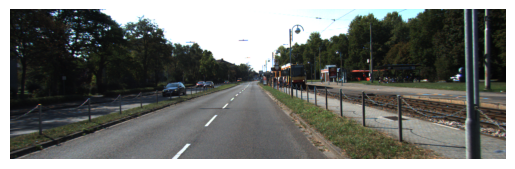

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para aplicar Canny
def canny_edge_detection(image, low_threshold, high_threshold):
    # Convertir la imagen a escala de grises
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar el filtro de Sobel para encontrar gradientes en la imagen
    sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)

    # Calcular la magnitud del gradiente
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Calcular la dirección del gradiente
    gradient_direction = np.arctan2(sobel_y, sobel_x)

    # Aplicar la supresión de no máximos
    suppressed_gradient = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_direction[i, j]
            if (angle >= 0 and angle <= np.pi / 4) or (angle >= 7 * np.pi / 4 and angle <= 2 * np.pi):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (angle >= np.pi / 4 and angle <= 3 * np.pi / 4):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j - 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j + 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (angle >= 3 * np.pi / 4 and angle <= 5 * np.pi / 4):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            else:
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j + 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j - 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]

    # Aplicar la binarización con histéresis (Canny)
    high_threshold = np.max(suppressed_gradient) * high_threshold
    low_threshold = high_threshold * low_threshold

    # Crear una imagen de bordes final
    edge_image = np.zeros_like(suppressed_gradient, dtype=np.uint8)
    strong_edge_i, strong_edge_j = np.where(suppressed_gradient >= high_threshold)
    weak_edge_i, weak_edge_j = np.where((suppressed_gradient >= low_threshold) &
                                        (suppressed_gradient < high_threshold))

    edge_image[strong_edge_i, strong_edge_j] = 255
    edge_image[weak_edge_i, weak_edge_j] = 50  # Valor intermedio para bordes débiles

    return edge_image

# Función para aplicar la Transformada de Hough
def hough_transform(edge_image, theta_resolution=1, rho_resolution=1):
    height, width = edge_image.shape
    max_rho = int(np.sqrt(height**2 + width**2))

    # Rango de valores de theta
    thetas = np.deg2rad(np.arange(-90, 90, theta_resolution))

    # Matriz acumuladora para la Transformada de Hough
    accumulator = np.zeros((2 * max_rho, len(thetas)), dtype=np.uint64)

    # Obtener las coordenadas de los bordes detectados
    edge_coordinates = np.argwhere(edge_image > 0)

    for i in range(len(edge_coordinates)):
        y, x = edge_coordinates[i]
        for t_index in range(len(thetas)):
            rho = int(x * np.cos(thetas[t_index]) + y * np.sin(thetas[t_index]))
            rho_index = rho + max_rho
            accumulator[rho_index, t_index] += 1

    return accumulator, thetas


# Cargar la imagen (asegúrate de cargar una imagen que tengas en tu entorno de Colab)
# Por ejemplo, si tienes una imagen llamada 'um_000002.png' en tu entorno, puedes cargarla así:
image = cv2.imread('um_000002.png')

# Aplicar Canny para detectar bordes
edge_image = canny_edge_detection(image, low_threshold=0.1, high_threshold=0.3)

# Aplicar la Transformada de Hough
accumulator, thetas = hough_transform(edge_image)

# Detectar líneas a partir de los máximos en la matriz acumuladora
threshold = 150  # Ajusta este valor según tus necesidades
rho_values, theta_values = np.where(accumulator > threshold)

# Dibujar las líneas detectadas en una copia de la imagen original
output_image = image.copy()

# Crear una lista para almacenar los puntos de intersección
intersection_points = []

for rho, theta in zip(rho_values, theta_values):
    a = np.cos(thetas[theta])  # Parámetro 'a' de la ecuación de la línea
    b = np.sin(thetas[theta])  # Parámetro 'b' de la ecuación de la línea
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    # Dibuja la línea en la imagen
    cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Almacena los puntos de intersección en la lista
    intersection_points.append((x0, y0))

# Dibuja los puntos de intersección en la imagen
for point in intersection_points:
    x, y = map(int, point)
    cv2.circle(output_image, (x, y), 5, (0, 255, 0), -1)

# Mostrar la imagen con las líneas y los puntos de intersección
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


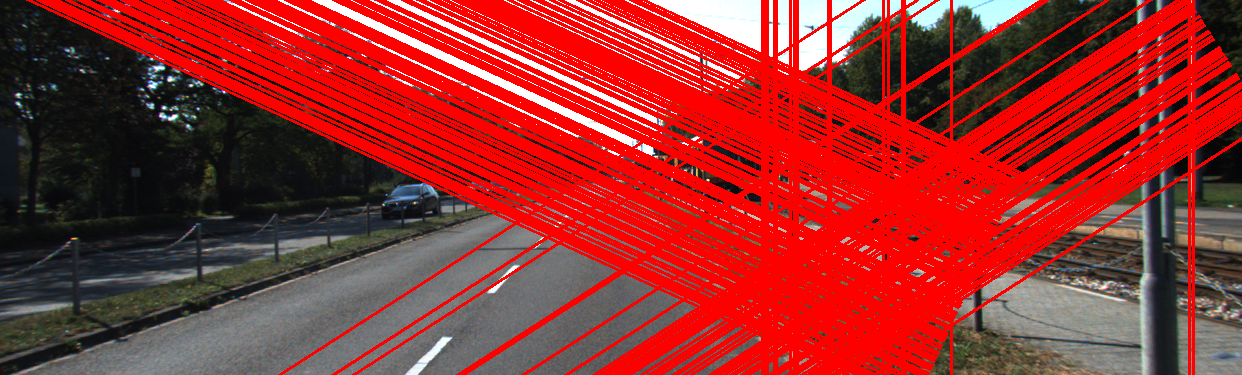

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Importar cv2_imshow para mostrar imágenes en Colab

# Función para aplicar Canny
def canny_edge_detection(image, low_threshold, high_threshold):
    # Convertir la imagen a escala de grises
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar el filtro de Canny
    edge_image = cv2.Canny(grayscale_image, low_threshold, high_threshold)

    return edge_image

# Función para aplicar la Transformada de Hough
def hough_transform(edge_image, theta_resolution=1, rho_resolution=1):
    lines = cv2.HoughLines(edge_image, rho_resolution, theta_resolution, threshold=100)
    return lines

# Cargar la imagen
image = cv2.imread('um_000002.png')

# Aplicar Canny para detectar bordes
edge_image = canny_edge_detection(image, low_threshold=50, high_threshold=150)

# Aplicar la Transformada de Hough
lines = hough_transform(edge_image)

# Dibujar las líneas detectadas en una copia de la imagen original
output_image = image.copy()

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Mostrar la imagen con las líneas detectadas en Colab
cv2_imshow(output_image)

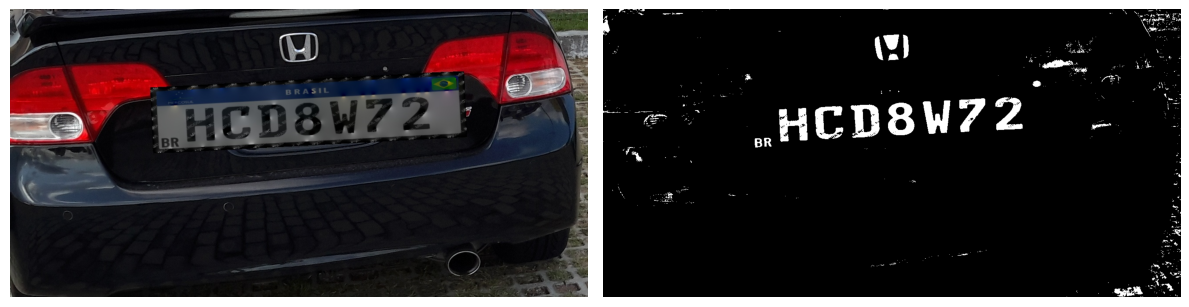

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('uno.jpg', cv2.IMREAD_COLOR)  # Leer la imagen en formato RGB

# Convertir la imagen original a escala de grises
imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Aplicar la binarización de Otsu con umbralización
_, imagen_binarizada1 = cv2.threshold(imagen_gray, 20, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Aplicar el algoritmo de etiquetado de componentes conectados
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(imagen_binarizada1)

tamano_maximo = 10000

for label in range(1, num_labels):
    if stats[label, cv2.CC_STAT_AREA] > tamano_maximo:
        labels[labels == label] = 0

imagen_binarizada = np.where(labels > 0, 255, 0).astype(np.uint8)

# Crear una figura con dos subplots para mostrar ambas imágenes
plt.figure(figsize=(12, 6))

# Subplot para la imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Subplot para la imagen binarizada invertida
plt.subplot(1, 2, 2)
plt.imshow(imagen_binarizada, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


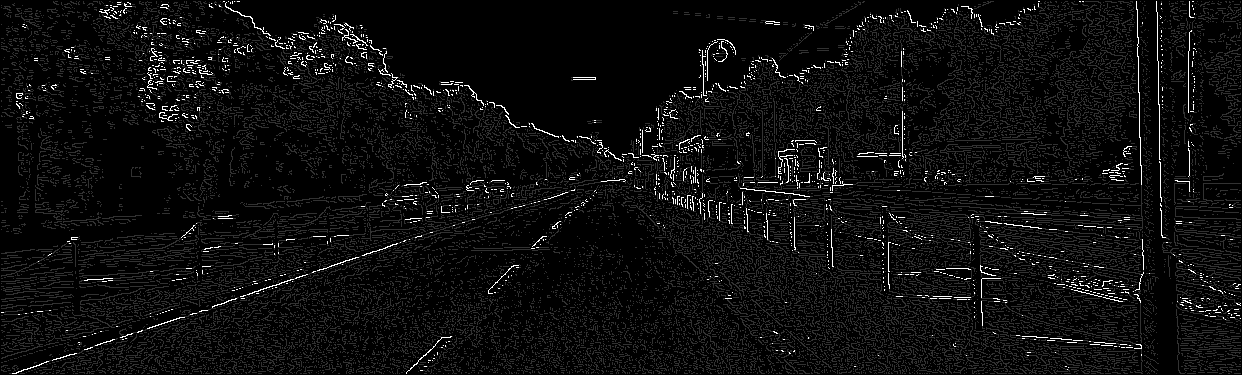

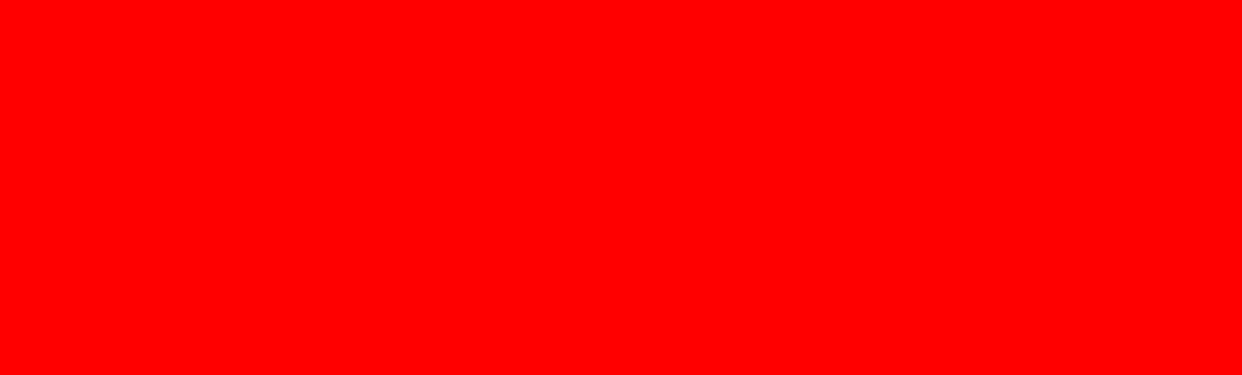

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Importar cv2_imshow para mostrar imágenes en Colab

# Función para aplicar Canny
def canny_edge_detection(image, low_threshold, high_threshold):
    # Convertir la imagen a escala de grises
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar el filtro de Sobel para encontrar gradientes en la imagen
    sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)

    # Calcular la magnitud del gradiente
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Calcular la dirección del gradiente
    gradient_direction = np.arctan2(sobel_y, sobel_x)

    # Aplicar la supresión de no máximos
    suppressed_gradient = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_direction[i, j]
            if (angle >= 0 and angle <= np.pi / 4) or (angle >= 7 * np.pi / 4 and angle <= 2 * np.pi):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (angle >= np.pi / 4 and angle <= 3 * np.pi / 4):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j - 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j + 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (angle >= 3 * np.pi / 4 and angle <= 5 * np.pi / 4):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            else:
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j + 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j - 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]

    # Aplicar la binarización con histéresis (Canny)
    high_threshold = np.max(suppressed_gradient) * high_threshold
    low_threshold = high_threshold * low_threshold

    # Crear una imagen de bordes final
    edge_image = np.zeros_like(suppressed_gradient, dtype=np.uint8)
    strong_edge_i, strong_edge_j = np.where(suppressed_gradient >= high_threshold)
    weak_edge_i, weak_edge_j = np.where((suppressed_gradient >= low_threshold) &
                                        (suppressed_gradient < high_threshold))

    edge_image[strong_edge_i, strong_edge_j] = 255
    edge_image[weak_edge_i, weak_edge_j] = 50  # Valor intermedio para bordes débiles

    return edge_image

# Función para aplicar la Transformada de Hough
def hough_transform(edge_image, theta_resolution=1, rho_resolution=1):
    height, width = edge_image.shape
    max_rho = int(np.sqrt(height**2 + width**2))

    # Rango de valores de theta
    thetas = np.deg2rad(np.arange(-90, 90, theta_resolution))

    # Matriz acumuladora para la Transformada de Hough
    accumulator = np.zeros((2 * max_rho, len(thetas)), dtype=np.uint64)

    # Obtener las coordenadas de los bordes detectados
    edge_coordinates = np.argwhere(edge_image > 0)

    for i in range(len(edge_coordinates)):
        y, x = edge_coordinates[i]
        for t_index in range(len(thetas)):
            rho = int(x * np.cos(thetas[t_index]) + y * np.sin(thetas[t_index]))
            rho_index = rho + max_rho
            accumulator[rho_index, t_index] += 1

    return accumulator, thetas

# Cargar la imagen desde tu sistema de archivos en Colab (reemplaza 'path_a_tu_imagen.png' con la ruta correcta)
image = cv2.imread('um_000002.png')

# Aplicar Canny para detectar bordes
canny_image = canny_edge_detection(image, low_threshold=0.1, high_threshold=0.3)

# Mostrar la imagen con bordes detectados en Colab
cv2_imshow(canny_image)

# Aplicar la Transformada de Hough a los resultados de Canny
accumulator, thetas = hough_transform(canny_image)

# Obtener el valor de max_rho
max_rho = int(np.sqrt(canny_image.shape[0]**2 + canny_image.shape[1]**2))

# Obtener las coordenadas de las líneas dominantes
def get_dominant_lines(accumulator, thetas, max_rho, threshold=50):
    lines = []
    for t_index in range(len(thetas)):
        for rho_index in range(len(accumulator)):
            if accumulator[rho_index, t_index] >= threshold:
                rho = rho_index - max_rho
                theta = thetas[t_index]
                lines.append((rho, theta))
    return lines

# Obtener las líneas dominantes
dominant_lines = get_dominant_lines(accumulator, thetas, max_rho)

# Dibujar las líneas en la imagen original
for line in dominant_lines:
    rho, theta = line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Mostrar la imagen con las líneas detectadas en Colab
cv2_imshow(image)